In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, genpareto

In [2]:
real = torch.load('data/real.pt')

In [3]:
sums = real.sum(dim=(1, 2, 3)).detach().cpu().numpy() / 4096
sums = sums*20 + 19

In [4]:
tail = np.where(sums > np.percentile(sums, 95))[0][-1]

In [5]:
body_dist, tail_dist = sums[tail:], sums[:tail]

In [6]:
skewnorm_params = skewnorm.fit(sums)
genpareto_params = genpareto.fit(tail_dist - sums[tail])

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [7]:
body_rv = skewnorm(*skewnorm_params)
tail_rv = genpareto(*genpareto_params)

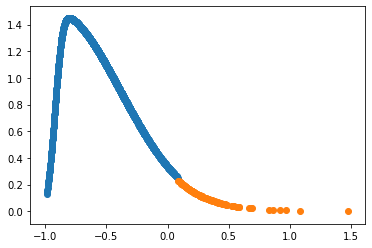

In [8]:
plt.scatter(body_dist, body_rv.pdf(body_dist))
plt.scatter(tail_dist, (1-body_rv.cdf(sums[tail]))*tail_rv.pdf(tail_dist - sums[tail]))

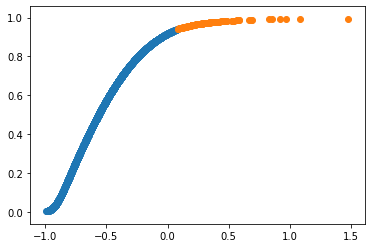

In [9]:
plt.scatter(body_dist, body_rv.cdf(body_dist))
plt.scatter(tail_dist, body_rv.cdf(body_dist[0])+0.05*tail_rv.cdf(tail_dist - sums[tail]))

In [10]:
sums[tail]

0.08699417

In [11]:
genpareto_params

(-0.07241964091641762, 0.0007877211367414993, 0.25543821779344433)

In [12]:
skewnorm_params

(10.732322904924764, -0.9232793649630112, 0.5328454693681157)